1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Generate 10,000 samples of flipping 3 coins
n_trials = 3
n_samples = 10000
np.random.seed(42)
samples = np.random.binomial(n=n_trials, p=0.5, size=n_samples)
samples

array([1, 3, 2, ..., 3, 1, 1])

In [28]:
# plot probability distribution
heads, counts = np.unique(samples, return_counts=True)
empirical_probs = counts / n_samples
empirical_probs

array([0.1278, 0.3798, 0.3728, 0.1196])

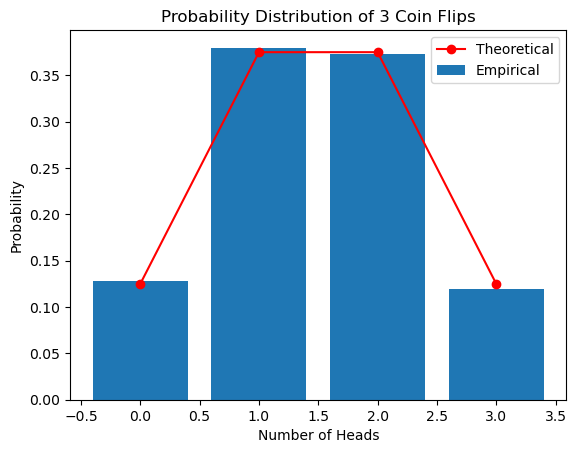

In [36]:
# Plot empirical distribution
plt.bar(heads, empirical_probs, label='Empirical')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution of 3 Coin Flips')
# Theoretical probabilities (binomial PMF)
theoretical_probs = [st.binom.pmf(k, n_trials, 0.5) for k in range(4)]
plt.plot(range(4), theoretical_probs, 'ro-', label='Theoretical')
plt.legend()
plt.show()

In [37]:
# Expected value (mean) of empirical distribution
expected_value_empirical = np.mean(samples)
print("Empirical Expected Value:", expected_value_empirical)

Empirical Expected Value: 1.4842


In [32]:
# Theoretical expected value
expected_value_theoretical = n_trials * 0.5
print("Theoretical Expected Value:", expected_value_theoretical)

Theoretical Expected Value: 1.5


In [33]:
# Compare probabilities
for k in range(4):
    print(f"Heads={k}: Empirical={empirical_probs[k]:.4f}, Theoretical={theoretical_probs[k]:.4f}")

Heads=0: Empirical=0.1278, Theoretical=0.1250
Heads=1: Empirical=0.3798, Theoretical=0.3750
Heads=2: Empirical=0.3728, Theoretical=0.3750
Heads=3: Empirical=0.1196, Theoretical=0.1250


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

In [13]:
# Generate two samples from normal distributions
np.random.seed(42)
sample_A = np.random.normal(loc=70, scale=5, size=100)
sample_B = np.random.normal(loc=73, scale=5, size=100)

In [14]:
sample_A

array([72.48357077, 69.30867849, 73.23844269, 77.61514928, 68.82923313,
       68.82931522, 77.89606408, 73.83717365, 67.65262807, 72.71280022,
       67.68291154, 67.67135123, 71.20981136, 60.43359878, 61.37541084,
       67.18856235, 64.9358444 , 71.57123666, 65.45987962, 62.93848149,
       77.32824384, 68.8711185 , 70.33764102, 62.87625907, 67.27808638,
       70.55461295, 64.24503211, 71.87849009, 66.99680655, 68.54153125,
       66.99146694, 79.26139092, 69.93251388, 64.71144536, 74.11272456,
       63.89578175, 71.04431798, 60.20164938, 63.35906976, 70.98430618,
       73.6923329 , 70.85684141, 69.42175859, 68.49448152, 62.60739005,
       66.40077896, 67.69680615, 75.28561113, 71.71809145, 61.18479922,
       71.62041985, 68.0745886 , 66.61539   , 73.05838144, 75.15499761,
       74.6564006 , 65.80391238, 68.45393812, 71.65631716, 74.87772564,
       67.60412881, 69.07170512, 64.46832513, 64.01896688, 74.06262911,
       76.78120014, 69.63994939, 75.01766449, 71.80818013, 66.77

In [15]:
sample_B

array([65.92314629, 70.89677339, 71.28642742, 68.98861365, 72.19357144,
       75.02025428, 82.43092951, 73.87288906, 74.28775195, 72.62777042,
       63.40614392, 72.86743062, 73.30115105, 85.31621056, 72.03819518,
       74.50773671, 72.82644115, 67.15660981, 78.71411407, 76.75966516,
       76.95515974, 68.45306273, 80.01397155, 65.99074469, 75.93428547,
       83.95227813, 68.04731837, 70.16851135, 73.49825683, 70.48262173,
       65.24668284, 73.34281487, 67.68848143, 75.36796215, 68.40287883,
       80.74967203, 69.08373354, 71.38969242, 77.06758609, 66.84567842,
       74.13729967, 79.53571377, 64.96258383, 73.92316929, 74.29941397,
       76.90911436, 66.81524645, 66.39771693, 75.60970783, 74.48492337,
       74.25246425, 74.73224105, 69.59987639, 74.16126849, 74.46536237,
       69.42824291, 82.32887256, 75.3691646 , 67.04348251, 76.28276804,
       68.12659165, 76.93542302, 78.7929779 , 68.89658841, 77.81688065,
       75.06390463, 77.1103008 , 82.48396491, 71.77305942, 69.23

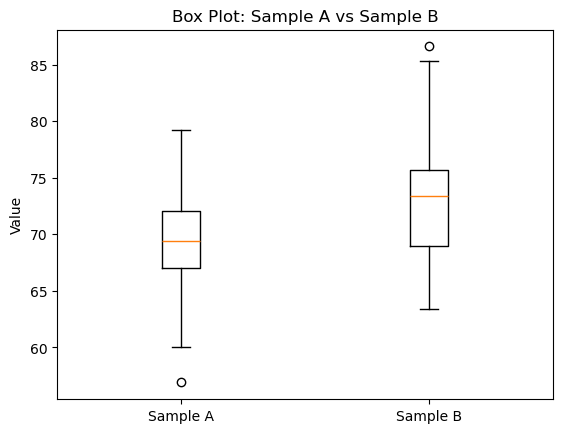

In [16]:
# Create a box plot comparing the two distributions
plt.boxplot([sample_A, sample_B], labels=['Sample A', 'Sample B'])
plt.ylabel('Value')
plt.title('Box Plot: Sample A vs Sample B')
plt.show()

In [17]:
# Conduct an independent t-test
t_stat, p_value = st.ttest_ind(sample_A, sample_B)
print(f"T-test statistic: {t_stat:.3f}, p-value: {p_value:.4f}")


T-test statistic: -5.514, p-value: 0.0000


In [18]:
# Calculate 95% confidence intervals
def conf_int(data, confidence=0.95):
    mean = np.mean(data)
    sem = st.sem(data)
    h = sem * st.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - h, mean + h

ci_A = conf_int(sample_A)
ci_B = conf_int(sample_B)
print(f"Sample A 95% CI: {ci_A}")
print(f"Sample B 95% CI: {ci_B}")

Sample A 95% CI: (68.57976581819051, 70.38176900786857)
Sample B 95% CI: (72.1653798708355, 74.05766599966378)


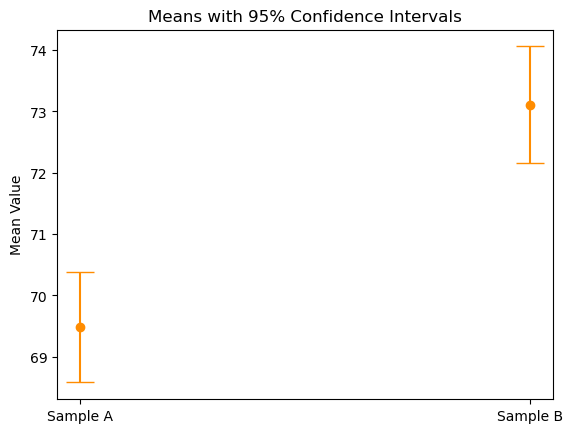

In [19]:
# Visualize confidence intervals
plt.errorbar(['Sample A', 'Sample B'], [np.mean(sample_A), np.mean(sample_B)],
             yerr=[np.mean(sample_A)-ci_A[0], np.mean(sample_B)-ci_B[0]],
             fmt='o', capsize=10, color='darkorange')
plt.ylabel('Mean Value')
plt.title('Means with 95% Confidence Intervals')
plt.show()

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

In [21]:
# Load iris dataset
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


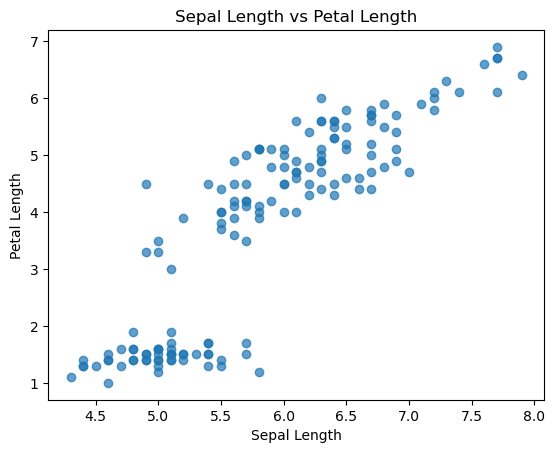

In [22]:
# Sepal length vs Petal length
plt.scatter(iris['sepal_length'], iris['petal_length'], alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.show()

In [23]:
r1, p1 = st.pearsonr(iris['sepal_length'], iris['petal_length'])
r2_1 = r1 ** 2
print(f"Sepal length vs Petal length: r={r1:.3f}, p={p1:.4g}, R^2={r2_1:.3f}")


Sepal length vs Petal length: r=0.872, p=1.039e-47, R^2=0.760


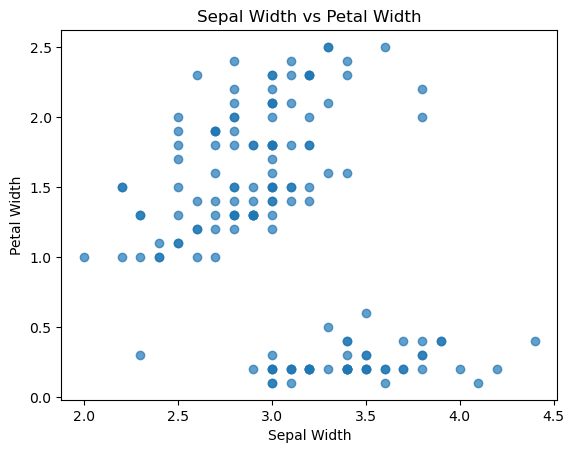

In [24]:
# Sepal width vs Petal width
plt.scatter(iris['sepal_width'], iris['petal_width'], alpha=0.7)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepal Width vs Petal Width')
plt.show()

In [25]:
r2, p2 = st.pearsonr(iris['sepal_width'], iris['petal_width'])
r2_2 = r2 ** 2
print(f"Sepal width vs Petal width: r={r2:.3f}, p={p2:.4g}, R^2={r2_2:.3f}")


Sepal width vs Petal width: r=-0.366, p=4.073e-06, R^2=0.134


In [26]:
# Interpretation
if abs(r1) > abs(r2):
    print("Sepal length and petal length show a stronger relationship (higher |r| and R^2).")
else:
    print("Sepal width and petal width show a stronger relationship (higher |r| and R^2).")

Sepal length and petal length show a stronger relationship (higher |r| and R^2).
